In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../..')
from gp2 import Runner

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmpp15t3i9jGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_unn.npy')

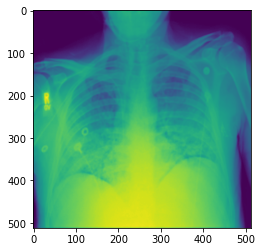

In [5]:
plt.imshow(images[500])

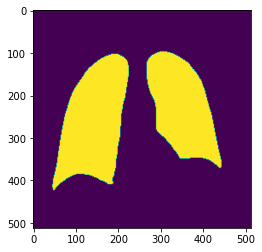

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

6012

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=6012, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 30s 4s/step - loss: 1.6571 - dice_coeff: 0.3499 - val_loss: 1.8549 - val_dice_coeff: 0.3339
Epoch 2/100
5/5 [==============================] - 7s 1s/step - loss: 1.4091 - dice_coeff: 0.3894 - val_loss: 1.6932 - val_dice_coeff: 0.3260
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 1.2793 - dice_coeff: 0.4188 - val_loss: 1.5600 - val_dice_coeff: 0.3180
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 1.1810 - dice_coeff: 0.4538 - val_loss: 1.4997 - val_dice_coeff: 0.3134
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 1.1050 - dice_coeff: 0.4754 - val_loss: 1.4499 - val_dice_coeff: 0.3102
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 1.0626 - dice_coeff: 0.4905 - val_loss: 1.4038 - val_dice_coeff: 0.3072
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 1.0041 - dice_coeff: 0.5132 - val_loss: 1.3890 - val_dice_coeff: 0

In [12]:
R.classifier_scores

[[1.3295965194702148, 0.309339702129364],
 [1.292918086051941, 0.3147534132003784],
 [0.9593622088432312, 0.4921112358570099],
 [0.7120908498764038, 0.619873583316803],
 [0.5550175309181213, 0.6872867345809937]]

In [13]:
R.discriminator_scores

[[0.0, 1.0],
 [1.6556841453407856e-09, 1.0],
 [375.3906555175781, 0.519444465637207],
 [464.7442321777344, 0.4972222149372101],
 [449.3003845214844, 0.5277777910232544]]

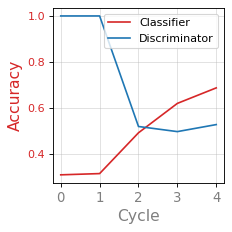

In [14]:
R.plot()